# Modeling Runner's Times in Cherry Blossom Race

Daniel Byrne, Joanna Duran

9/19/19

## Abstract

Running for pleasure in a slightly competitive weekend run, often for charity has become a weekend pleaure for many a heath enthusiist across the United States. In this paper we examine the realationship between age of the participants and the race year to see if annual races have attracted the same or varying age participants as the years have gone on.  

## Introduction

Running for pleasure in a slightly competitive weekend run, often for charity has become a weekend pleaure for many a heath enthusiist across the United States. Races tend to be sponsored by corporate benefactors and the sucessful ones continue their the compietitions  yearly. Often also the race organizers post the race data on their website for anyone to consume. We study the realationship between age of the participants and the race year to see if races havae attracted the same or varying age participants as the years have gone on.  

In this paper we examine the data from the Cherry Blossom Ten Mile Run held in Washington D.C. held annually in early April when the cherry trees in bloom. The Cherry Blossom race started in 1973.  It is used as a lead in competition for elite runners planning to compete in the Boston Marathon. 

Earlier [research][1] by Kaplan and Nolan had shown that 1999 runners were typically older than the 2012 runners. We compare the age distributions of male runners across the years 1999 - 2012.  We will answer "How do the distributions change over the years?" and "Was it a gradual change?"

## Methods

We began by first investigating the data mining approach used by Nolan and Kaplan.  It was extensive and comprehensive approach that worked well for the race data as it was presented on the [Cherry Blossom Race Results website][2] at the time of the study.  Since its publicatin however, the  website has changed their data repository, and so we took this opportunity to explore new ways to mine the data that could possibily be extended across all years to include the original study range and the years competed since and also prior to 1999.  

The mining approach we took was to use the CRAN r package rvest to identify the table on the results page that is updated to contain the data specified by the search parameters and the page number.  We then looped through the pages of data over the the period of interest by varying the search parameters and recording the data in UTF-8 csv files for each year 1999-2014. 

The code to scrape the data in its newest form was simplier to implement and thus less error. prone than the original.  The code consisted of simmply 2 r function
- `getResults(uri, year = 1999)` - Loops over every available page of datafor the selected year.
- `getAll()` - Loops over the years 1999-2014 and saves each year's data in a csv file.

The scraping code r code is listed in `cbreaddata.r`.

## Results

The results section will include intelligent discussion of the output of the work.  Please stick to the data and avoid commentary on the software including issues with errors, bugs or code.  Figures, tables, and diagrams are especially useful in this section.  Be sure to caption figures and describe them in a manner consistent with a professional report.  For example, if the assignment was to try a new method, compare the results with a previous standard method.  If multiple methods were used, compare the results to each other.  Describe what the data implies at a level of an educated reader in the field.

Refer to figures as 'Fig X.' such as Fig 1.  Figures can be presented inline or after the main text, but should always be a part of the main document.  It is asked that figures be generated by the software and not screen captures.  If you are uncertain how to generate a figure from a piece of software, feel free to ask.  Please note that all of the software packages utilized in this course are capable of producing graphics for export.  Label all axes, use units and other best practices.  Make the title descriptive of the data presented.  It is also acceptable to include your code inline for Jupyter, including graphics generation.

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

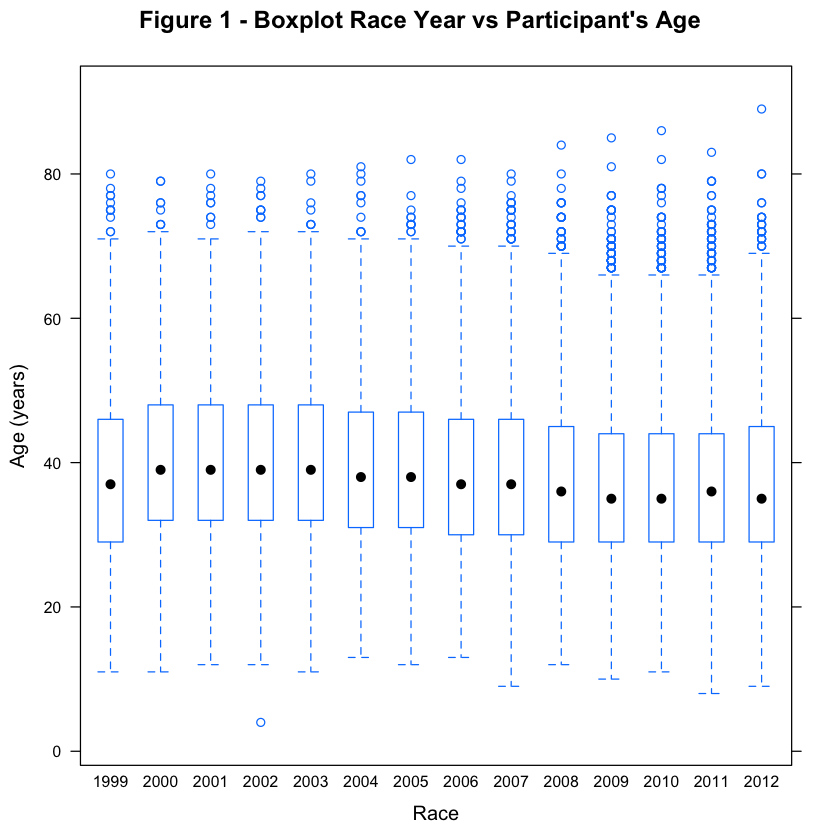

In [48]:
# Library
knitr::opts_chunk$set(echo = FALSE,warning = FALSE, message= FALSE)
library(mosaic)
library(gmodels)
library(RColorBrewer)
library(pander)
library(car)

# Load data
files = sapply(1999:2012,function(year){paste0("./MensResults",year,".csv")})
load.files = function(fileName) {
  read.csv(fileName,stringsAsFactors = FALSE)
}
mensResults = do.call(rbind,lapply(files, load.files))

## Convert to number
mensResults$Age = as.numeric(mensResults$Age)

## Convert to factor
mensResults$Race = sapply(mensResults$Race,function(x) { 
  r = strsplit(x, " ")[[1]][1]
  return (r)
})
mensResults$Race = as.factor(mensResults$Race)
bwplot(Age ~ Race,data=mensResults, ylab = "Age (years)", xlab = "Race", main="Figure 1 - Boxplot Race Year vs Participant's Age")

In [38]:
favstats(Age ~ Race, data = mensResults, main="test")

Race,min,Q1,median,Q3,max,mean,sd,n,missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1999,11,29,37,46,80,38.11654,10.48660,4608,2
2000,11,32,39,48,79,40.31884,10.53879,3036,0
2001,12,32,39,48,80,40.22070,10.61274,3575,3
2002,4,32,39,48,79,40.22567,10.71086,3740,3
2003,11,32,39,48,80,40.30272,10.75946,3941,2
2004,13,31,38,47,81,39.26027,10.95626,4161,0
2005,12,31,38,47,82,39.49862,11.06214,4334,10
2006,13,30,37,46,82,38.85837,10.95428,5253,1
2007,9,30,37,46,80,38.42407,11.14361,5235,2


The Boxplots in Figure 1 shows what appears to be a wandering mean over the years.  However, the standard deviation away from the mean hovers around a stable 10.5 years. The mean appears to decrease in general over time while the number of participants increases.  This portends a trend of increasing popularity that damps the affect of multi-year participant's increasing ages on the mean.

The wandering nature of the mean, and the fact that this data comes from a time series suggests that there may be some autocorelation in the data between the groups.  The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:

- 2 is no autocorrelation.
- 0 to <2 is positive autocorrelation (common in time series data).
- >2 to 4 is negative autocorrelation (less common in time series data).

In [52]:
durbinWatsonTest(lm(Age ~ Race,data=mensResults))

 lag Autocorrelation D-W Statistic p-value
   1      0.04937594      1.901212       0
 Alternative hypothesis: rho != 0

With a p-value of .049 and a DW Statistic 0f 1.9, there is weak evidence of positive serial autocorrelation indicating that the data is weakly dependant on the prior year's age distribution, and that it the signal is possible stationary and wandering around a group mean. 

Considering the weak evidence of autocorrelation, it is also reasonable to consider the data from sucessive years as independent observations.  

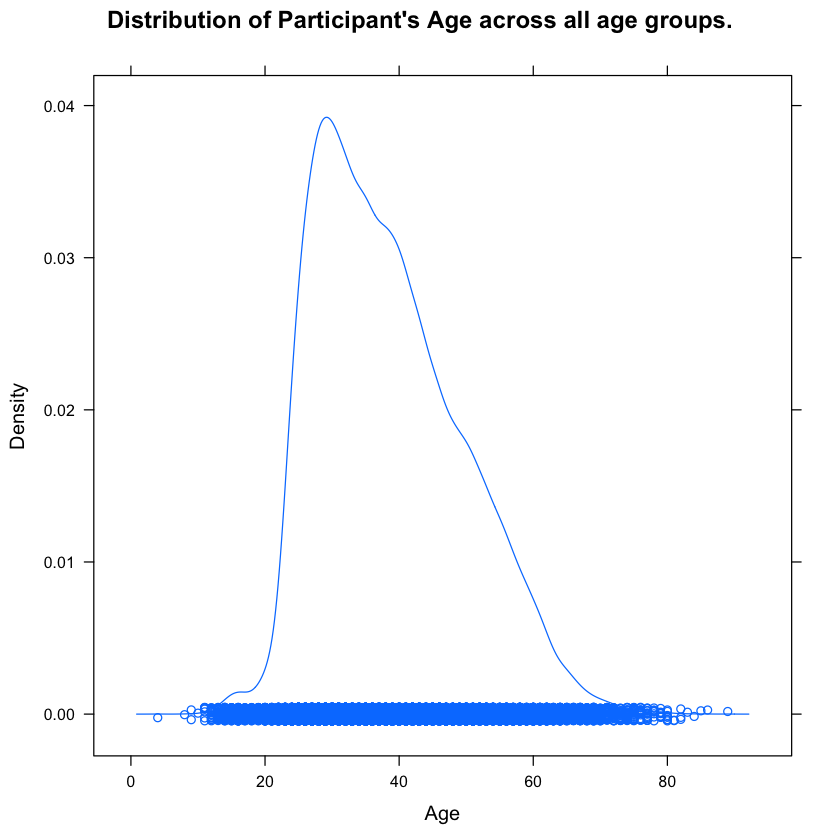

In [57]:
densityplot(~Age,data=mensResults, main = "Figure 2 - Distribution of Participant's Age across all age groups.")

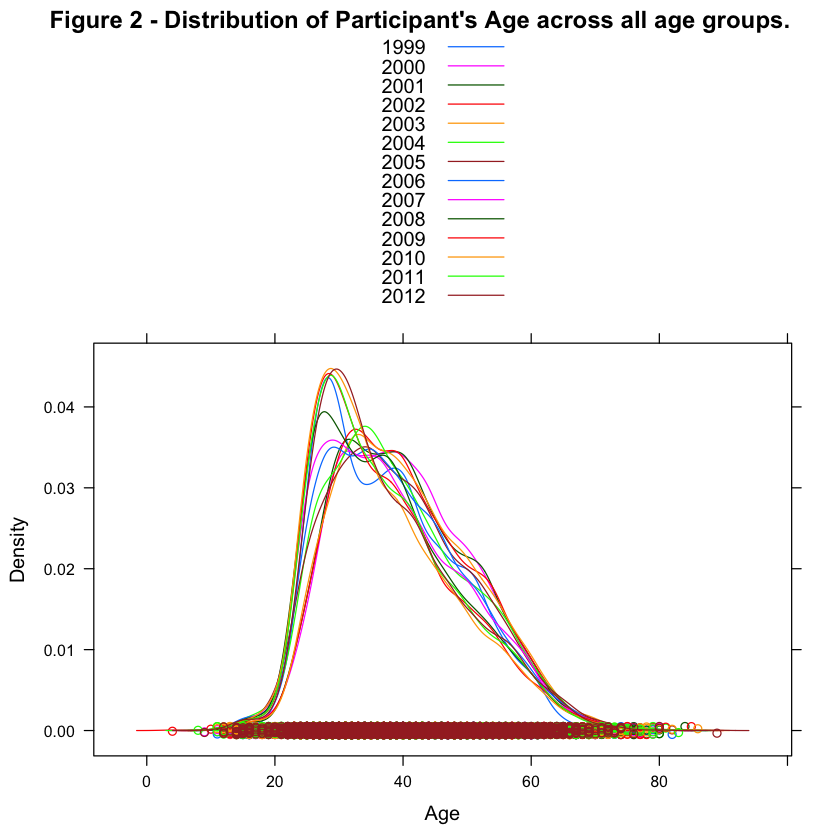

In [59]:
densityplot(~Age,data=mensResults,groups = Race,auto.key=TRUE,
            main = "Figure 2 - Distribution of Participant's Age across all age groups.")

### Conclusion
Summarize your results.  Again, do so in a professional manner.  Conclude with what was learned and any possible follow ups.  Avoiding again commenting on errors and software issues.  It is appropriate to talk about methods and how the results compare.

## References

- [1]: http://rdatasciencecases.org/ "Data Science in R. A Case Studies Approach to Computational Reasoning and Problem Solving", Deborah Nolan, Duncan Temple Lang, chapter 1 Predicting Location via Indoor Positioning Systems
- [2]: http://www.cballtimeresults.org/performances?utf8=%E2%9C%93&section=10M&year=2019&division=Overall+Men Credit Union Cheery Blossom Ten Mile Run Race Results